In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df = df.drop('Unnamed: 0',axis=1)
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
#Text Cleanser
import re
def clean_text(text):
    text = text.lower()                                       
    text = re.sub(r'http\S+|www\S+', '', text)                
    text = re.sub(r'\S+@\S+', '', text)                       
    text = re.sub(r'<.*?>', '', text)                         
    text = re.sub(r'[^a-z\s]', '', text)                      
    text = re.sub(r'\s+', ' ', text).strip()                
    return text


In [6]:
#Replacing the text in the data with cleansed text:
df['text'] = df['text'].apply(clean_text)
df

,label,text,label_num
0,ham,subject enron methanol meter this is a follow ...,0
1,ham,subject hpl nom for january see attached file ...,0
2,ham,subject neon retreat ho ho ho we re around to ...,0
3,spam,subject photoshop windows office cheap main tr...,1
4,ham,subject re indian springs this deal is to book...,0
...,...,...,...
5166,ham,subject put the on the ft the transport volume...,0
5167,ham,subject and following noms hpl can t take the ...,0
5168,ham,subject calpine daily gas nomination julie as ...,0
5169,ham,subject industrial worksheets for august activ...,0


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)
df['text'] = df['text'].apply(lemmatize_text)
df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wizar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,text,label_num
0,ham,subject enron methanol meter this is a follow ...,0
1,ham,subject hpl nom for january see attached file ...,0
2,ham,subject neon retreat ho ho ho we re around to ...,0
3,spam,subject photoshop window office cheap main tre...,1
4,ham,subject re indian spring this deal is to book ...,0
...,...,...,...
5166,ham,subject put the on the ft the transport volume...,0
5167,ham,subject and following noms hpl can t take the ...,0
5168,ham,subject calpine daily gas nomination julie a i...,0
5169,ham,subject industrial worksheet for august activi...,0


In [8]:
print(df['label_num'].value_counts())

label_num
0    3672
1    1499
Name: count, dtype: int64


C:\Users\wizar\AppData\Local\Temp\ipykernel_8672\1043136226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


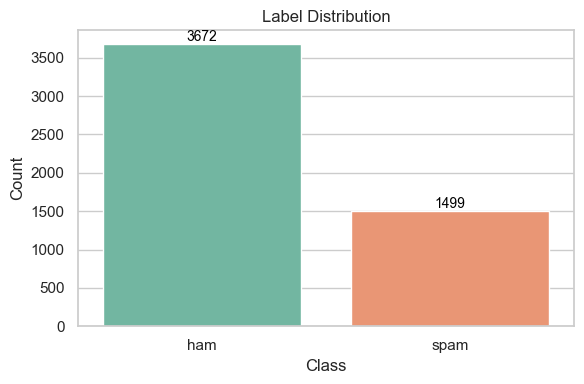

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Label Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.tight_layout()
plt.show()

In [11]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    lowercase=True,         
    stop_words='english',   
    max_features=5000,      
    ngram_range=(1, 2)      
)
X_tfidf = tfidf.fit_transform(df['text'])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label_num'], test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9797
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [29]:
#Trying with another classification model - SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
y_pred1 = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Accuracy: 0.9845410628019323
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.97      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [30]:
#Trying XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred2 = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

c:\Users\wizar\OneDrive\Desktop\STALINGRAD\Projects\Spam Message Classification\Env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:43:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9710144927536232
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       742
           1       0.93      0.97      0.95       293

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [23]:
#Since SVM offered good Accuracy trying Hyper-parameter Tuning on SVM
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   3.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.791 total time=   3.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=   9.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.805 total time=  10.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.799 total time=   5.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   3.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   3.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   3.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   3.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   3.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.708 total time=   2.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [31]:
grid_predictions = grid.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Accuracy: 0.9884057971014493
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



In [47]:
#Using ART for robustness
from art.estimators.classification import SklearnClassifier
art_classifier = SklearnClassifier(model=grid)


In [48]:
raw_text = ["Free entry! You have won a prize."] 
X_sample = tfidf.transform(raw_text).toarray()
y_sample = np.array([1]) 

In [49]:
from art.attacks.evasion import HopSkipJump
attack = HopSkipJump(classifier=art_classifier, targeted=False, max_iter=10)
X_adv = attack.generate(x=X_sample)
pred_orig = art_classifier.predict(X_sample)
pred_adv = art_classifier.predict(X_adv)
print("Original prediction:", pred_orig)
print("Adversarial prediction:", pred_adv)


HopSkipJump: 100%|██████████| 1/1 [00:13<00:00, 13.30s/it]

Original prediction: [[0. 1.]]
Adversarial prediction: [[1. 0.]]


In [50]:
X_eval = X_test[:100].toarray()
y_eval = y_test[:100]
X_adv = attack.generate(x=X_eval)
y_pred_adv = art_classifier.predict(X_adv)
y_pred_labels = np.argmax(y_pred_adv, axis=1)
print("Robustness accuracy on adversarial examples:", accuracy_score(y_eval, y_pred_labels))

HopSkipJump: 100%|██████████| 100/100 [13:34<00:00,  8.14s/it]


Robustness accuracy on adversarial examples: 0.75
